In [2]:
import pandas as pd

In [3]:
df_votants = pd.read_csv('database_deputes.csv', index_col=0)
df_votes = pd.read_csv('database_votes2.csv', index_col=0)

In [392]:
df_votes

,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,...,Région,Département,Numéro de circonscription,Profession,Groupe politique (complet),Groupe politique (abrégé),date_naissance,type_mandat,type_organe,qualite_mandat
0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,Bretagne,Finistère,6,Cadre du secteur privé,La République en Marche,LaREM,1962-07-01,MandatParlementaire_type,ASSEMBLEE,membre
1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,Ile-de-France,Paris,13,Cadre supérieur (entreprises publiques),La République en Marche,LaREM,NaN,NaN,NaN,NaN
2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,Auvergne-Rhône-Alpes,Loire,2,Autre cadre (secteur privé),La République en Marche,LaREM,NaN,NaN,NaN,NaN
3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,Normandie,Manche,3,Cadre commercial,La République en Marche,LaREM,1969-10-12,MandatParlementaire_type,ASSEMBLEE,membre
4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,Provence-Alpes-Côte d'Azur,Hautes-Alpes,1,NaN,La République en Marche,LaREM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290491,3116,PA719302,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,Auvergne-Rhône-Alpes,Drôme,2,Avocat,La République en Marche,LaREM,NaN,NaN,NaN,NaN
290492,3116,PA719600,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,Nouvelle-Aquitaine,Gironde,6,Fonctionnaire de catégorie B,La République en Marche,LaREM,NaN,NaN,NaN,NaN
290493,3116,PA720772,Contre,PO730970,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,Nouvelle-Aquitaine,Pyrénées-Atlantiques,6,Professeur de faculté,Mouvement Démocrate (MoDem) et Démocrates appa...,Dem,NaN,NaN,NaN,NaN
290494,3116,PA720310,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,Grand Est,Moselle,6,Dentiste,La République en Marche,LaREM,NaN,NaN,NaN,NaN


In [270]:
indice_accord = pd.read_csv('indice_accord.csv', index_col=0)
indice_accord = indice_accord[['idVotant', 'IndiceAccord']]
indice_accord = indice_accord.rename(columns={'IndiceAccord' : 'indice_accord'})
indice_accord

,idVotant,indice_accord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.120959
3,PA718802,74.705882
4,PA719032,74.860957
...,...,...
570,PA720802,36.000000
571,PA643004,27.272727
572,PA719002,14.285714
573,PA774958,14.583333


In [271]:
df_clustering = df_votants[['idVotant', 'Région']]
df_cluster = df_clustering.merge(indice_accord, on='idVotant', how='left')
df_cluster = df_cluster.groupby(['idVotant', 'Région', 'indice_accord']).count().reset_index()
df_cluster

,idVotant,Région,indice_accord
0,PA1008,Nouvelle-Aquitaine,31.937984
1,PA1012,Auvergne-Rhône-Alpes,37.425150
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364
3,PA1198,Normandie,32.047478
4,PA1206,Ile-de-France,28.409091
...,...,...,...
570,PA774962,Réunion,40.000000
571,PA856,Grand Est,38.770053
572,PA923,Grand Est,40.259740
573,PA942,Grand Est,51.327434


In [272]:
proportion_vote = pd.read_csv('proportion_vote.csv', index_col=0)
proportion_vote

,idVotant,Contre,Pour
0,PA1008,31.162791,68.837209
1,PA1012,34.131737,65.868263
2,PA1029,51.818182,48.181818
3,PA1198,33.234421,66.765579
4,PA1206,45.454545,54.545455
...,...,...,...
570,PA774962,80.000000,20.000000
571,PA856,42.780749,57.219251
572,PA923,41.991342,58.008658
573,PA942,49.778761,50.221239


In [273]:
df_cluster = df_cluster.merge(proportion_vote, on='idVotant', how='left')
df_cluster

,idVotant,Région,indice_accord,Contre,Pour
0,PA1008,Nouvelle-Aquitaine,31.937984,31.162791,68.837209
1,PA1012,Auvergne-Rhône-Alpes,37.425150,34.131737,65.868263
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364,51.818182,48.181818
3,PA1198,Normandie,32.047478,33.234421,66.765579
4,PA1206,Ile-de-France,28.409091,45.454545,54.545455
...,...,...,...,...,...
570,PA774962,Réunion,40.000000,80.000000,20.000000
571,PA856,Grand Est,38.770053,42.780749,57.219251
572,PA923,Grand Est,40.259740,41.991342,58.008658
573,PA942,Grand Est,51.327434,49.778761,50.221239


In [180]:
#region = pd.read_excel('region.xls')
#region

,Population par région,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Estimations de population au 1er janvier 20181...,Variation annuelle moyenne 18/10\nen %,NaN,NaN,Densité moyenne au 1er janvier 2018\nen hab/km2
2,NaN,NaN,Totale,Due au solde naturel,Due au solde apparent des entrées et des sorties2,NaN
3,Auvergne-Rhône-Alpes,8037.06,0.7,0.4,0.3,115.291
4,Bourgogne-Franche-Comté,2813.29,0,0.1,-0.1,58.8748
5,Bretagne,3336.64,0.5,0.1,0.4,122.635
6,Centre-Val de Loire,2582.52,0.2,0.1,0.1,65.9633
7,Corse,337.796,1.1,0,1.1,38.9175
8,Grand Est,5548.09,0,0.2,-0.2,96.6004
9,Hauts-de-France,6023.34,0.1,0.4,-0.3,189.332


In [181]:
#region = region[['Population par région', 'Unnamed: 5']]
#region = region.rename(columns={'Unnamed: 5' : 'densite_population_region', 'Population par région' : 'Région'})
#region = region.iloc[3:22]
#region

,Région,densite_population_region
3,Auvergne-Rhône-Alpes,115.291
4,Bourgogne-Franche-Comté,58.8748
5,Bretagne,122.635
6,Centre-Val de Loire,65.9633
7,Corse,38.9175
8,Grand Est,96.6004
9,Hauts-de-France,189.332
10,Ile-de-France,1019.47
11,Normandie,111.763
12,Nouvelle-Aquitaine,71.31


In [184]:
#df_cluster = df_cluster.merge(region, on='Région', how='left')
#df_cluster

,idVotant,Région,indice_accord,Contre,Pour,densite_population_region
0,PA1008,Nouvelle-Aquitaine,31.937984,31.162791,68.837209,71.31
1,PA1012,Auvergne-Rhône-Alpes,37.425150,34.131737,65.868263,115.291
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364,51.818182,48.181818,161.331
3,PA1198,Normandie,32.047478,33.234421,66.765579,111.763
4,PA1206,Ile-de-France,28.409091,45.454545,54.545455,1019.47
...,...,...,...,...,...,...
570,PA774962,Réunion,40.000000,80.000000,20.000000,345.819
571,PA856,Grand Est,38.770053,42.780749,57.219251,96.6004
572,PA923,Grand Est,40.259740,41.991342,58.008658,96.6004
573,PA942,Grand Est,51.327434,49.778761,50.221239,96.6004


In [274]:
df_cluster = df_cluster.drop(columns='Région')

In [275]:
df_cluster

,idVotant,indice_accord,Contre,Pour
0,PA1008,31.937984,31.162791,68.837209
1,PA1012,37.425150,34.131737,65.868263
2,PA1029,43.636364,51.818182,48.181818
3,PA1198,32.047478,33.234421,66.765579
4,PA1206,28.409091,45.454545,54.545455
...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000
571,PA856,38.770053,42.780749,57.219251
572,PA923,40.259740,41.991342,58.008658
573,PA942,51.327434,49.778761,50.221239


In [276]:
oui = df_votes.groupby('idVotant').count()
oui['taux_participation'] = oui['idScrutin']/3117*100
oui = oui[['taux_participation']]
oui

,taux_participation
idVotant,
PA1008,20.692974
PA1012,10.715432
PA1029,3.529034
PA1198,10.811678
PA1206,5.646455
...,...
PA774962,0.160411
PA856,11.998717
PA923,7.410972


In [277]:
df_cluster = df_cluster.merge(oui, on='idVotant', how='left')
df_cluster

,idVotant,indice_accord,Contre,Pour,taux_participation
0,PA1008,31.937984,31.162791,68.837209,20.692974
1,PA1012,37.425150,34.131737,65.868263,10.715432
2,PA1029,43.636364,51.818182,48.181818,3.529034
3,PA1198,32.047478,33.234421,66.765579,10.811678
4,PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000,0.160411
571,PA856,38.770053,42.780749,57.219251,11.998717
572,PA923,40.259740,41.991342,58.008658,7.410972
573,PA942,51.327434,49.778761,50.221239,14.501123


In [278]:
df_cluster = df_cluster.set_index('idVotant')
df_cluster

,indice_accord,Contre,Pour,taux_participation
idVotant,,,,
PA1008,31.937984,31.162791,68.837209,20.692974
PA1012,37.425150,34.131737,65.868263,10.715432
PA1029,43.636364,51.818182,48.181818,3.529034
PA1198,32.047478,33.234421,66.765579,10.811678
PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411
PA856,38.770053,42.780749,57.219251,11.998717
PA923,40.259740,41.991342,58.008658,7.410972


In [279]:
copy = df_votes.copy()
copy = copy.pivot(index = 'idVotant', columns = 'idScrutin', values = 'vote')
copy

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,Pour
PA1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN
PA1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,NaN
PA1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
#copy = copy.dropna(thresh = 285) 
#un peu à l'arrache, il faudrait faire ça de manière plus jolie pcq là on sort une liste sans index 
#et on la rebalance dans le DF
#a priori pas de souci pcq le DF copy est trié mais bon c'est pas très clean
maj = []
for scrutin in range(3117):
    votemaj = pd.DataFrame(copy[scrutin].value_counts())[scrutin].idxmax()
    maj.append(votemaj)

copy.loc['vote_majoritaire'] = maj
copy = copy.fillna(copy.loc['vote_majoritaire'])
copy

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Pour
PA1012,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Pour,Contre,Contre
PA1029,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA1198,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Contre
PA1206,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA856,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA923,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Pour,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA942,Pour,Contre,Pour,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Pour,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre


In [281]:
resultats = pd.get_dummies(copy, drop_first=True)
resultats = resultats.drop('vote_majoritaire', axis=0)
resultats

,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,5_Non-votant,5_Pour,6_Pour,7_Pour,...,3111_Non-votant,3111_Pour,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
PA1012,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
PA1029,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA1198,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
PA1206,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA856,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA923,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA942,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [283]:
df_cluster = df_cluster.merge(resultats, left_index=True, right_index=True)
df_cluster

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,...,3111_Non-votant,3111_Pour,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [284]:
#Test pour savoir quel nombre de clusters est le plus optimal 
from sklearn.cluster import KMeans
from sklearn import metrics

NB_CLUSTERS = 10 #nombre maximal de clusters qu'on veut tester

for k in range(2, NB_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster) #kmeans avec k clusters    
    #puis on détermine le coefficient de silhouette associé, qui mesure la pertinence du clustering :
    coef_sil = metrics.silhouette_score(df_cluster, kmeans.labels_, metric='euclidean') 
    print("Nombre de clusters: {}".format(k))
    print('Coefficient de silhouette: {:.3g}'.format(coef_sil))
    print("-" * 100)

Nombre de clusters: 2
Coefficient de silhouette: 0.577
----------------------------------------------------------------------------------------------------
Nombre de clusters: 3
Coefficient de silhouette: 0.397
----------------------------------------------------------------------------------------------------
Nombre de clusters: 4
Coefficient de silhouette: 0.299
----------------------------------------------------------------------------------------------------
Nombre de clusters: 5
Coefficient de silhouette: 0.255
----------------------------------------------------------------------------------------------------
Nombre de clusters: 6
Coefficient de silhouette: 0.242
----------------------------------------------------------------------------------------------------
Nombre de clusters: 7
Coefficient de silhouette: 0.243
----------------------------------------------------------------------------------------------------
Nombre de clusters: 8
Coefficient de silhouette: 0.258
---------

In [285]:
N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster)

df_cluster['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [286]:
df_clusterised = df_cluster
df_clusterised

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,...,3111_Pour,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [287]:
groupe = df_votes[['idVotant', 'Groupe politique (complet)']].drop_duplicates()
groupe = groupe.set_index('idVotant')
groupe

,Groupe politique (complet)
idVotant,
PA606171,La République en Marche
PA721824,La République en Marche
PA719952,La République en Marche
PA607395,La République en Marche
PA718710,La République en Marche
...,...
PA643192,Socialistes et apparentés
PA721768,La République en Marche
PA774962,Gauche démocrate et républicaine


In [288]:
df_final = df_clusterised.merge(groupe, left_index=True, right_index=True)
df_final

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour,cluster,Groupe politique (complet)
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,Socialistes et apparentés
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,Les Républicains
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les Républicains
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,Socialistes et apparentés
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Gauche démocrate et républicaine
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les Républicains
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les Républicains


In [289]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster = []
for i in range (N_CLUSTERS):
     list_cluster.append(df_final[df_final['cluster'] == i])

In [290]:
list_cluster[0]

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour,cluster,Groupe politique (complet)
idVotant,,,,,,,,,,,,,,,,,,,,,
PA2449,74.313725,62.941176,37.058824,16.361886,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,La République en Marche
PA267337,80.000000,71.428571,28.571429,1.122875,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,La République en Marche
PA267355,64.026403,44.224422,55.775578,9.720885,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Agir ensemble
PA267780,63.874346,52.879581,47.120419,24.510748,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Agir ensemble
PA267794,47.619048,60.714286,39.285714,2.694899,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Les Républicains
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA724827,73.940678,62.500000,37.500000,15.142765,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,La République en Marche
PA755549,64.197531,46.913580,53.086420,2.598653,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Libertés et Territoires
PA760658,74.528302,55.974843,44.025157,10.202117,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,La République en Marche


In [291]:
list_cluster[1]

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour,cluster,Groupe politique (complet)
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,Socialistes et apparentés
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,Les Républicains
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les Républicains
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,Socialistes et apparentés
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774958,14.583333,14.583333,85.416667,1.539942,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Socialistes et apparentés
PA774960,46.428571,32.142857,67.857143,0.898300,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Socialistes et apparentés
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les Républicains


[Text(0, 0, 'Socialistes et apparentés'),
 Text(0, 0, 'Les Républicains'),
 Text(0, 0, 'Non inscrit'),
 Text(0, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(0, 0, 'Libertés et Territoires'),
 Text(0, 0, 'La France insoumise'),
 Text(0, 0, 'UDI et Indépendants'),
 Text(0, 0, 'Gauche démocrate et républicaine'),
 Text(0, 0, 'La République en Marche'),
 Text(0, 0, 'Agir ensemble')]

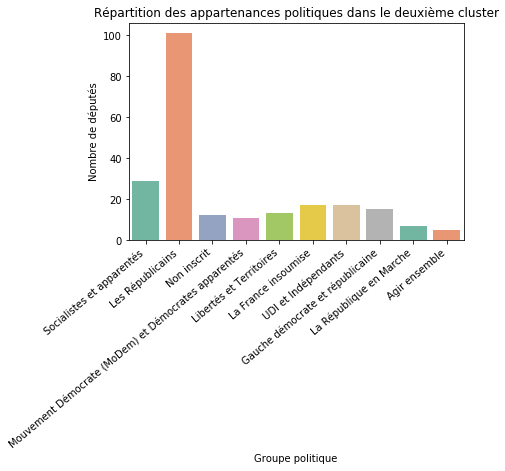

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(data=list_cluster[1], x='Groupe politique (complet)', palette='Set2')
plt.title('Répartition des appartenances politiques dans le deuxième cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

[Text(0, 0, 'La République en Marche'),
 Text(0, 0, 'Agir ensemble'),
 Text(0, 0, 'Les Républicains'),
 Text(0, 0, 'Non inscrit'),
 Text(0, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(0, 0, 'Libertés et Territoires'),
 Text(0, 0, 'UDI et Indépendants'),
 Text(0, 0, 'Gauche démocrate et républicaine')]

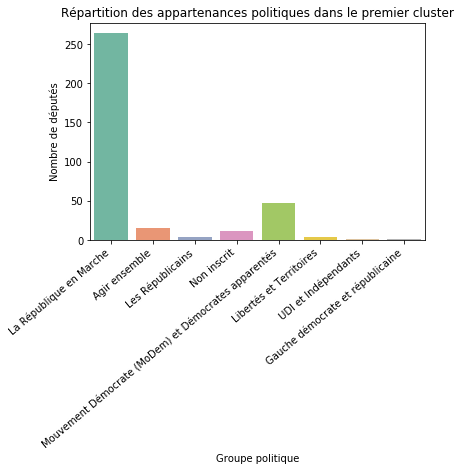

In [362]:
g = sns.countplot(data=list_cluster[0], x='Groupe politique (complet)', palette='Set2')
plt.title('Répartition des appartenances politiques dans le premier cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

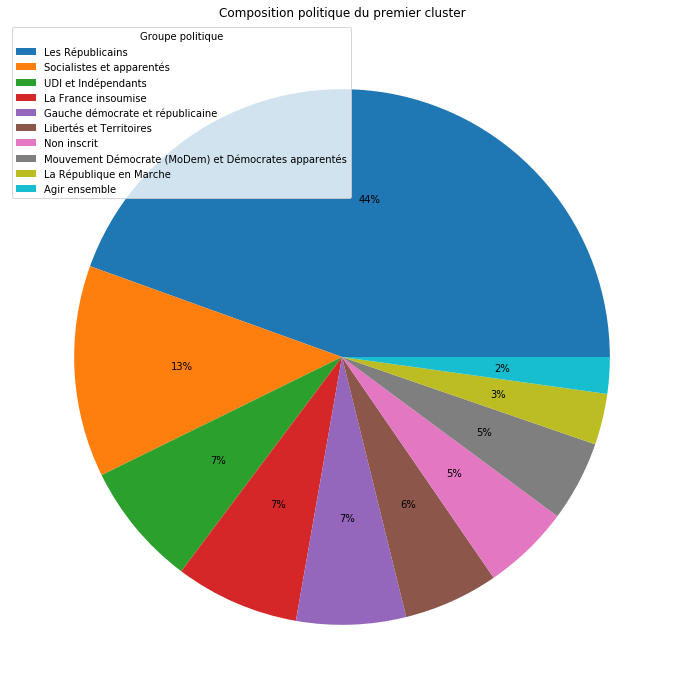

In [383]:
plt.figure(1, figsize=(12, 14))

g = plt.pie(list_cluster[1]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster[1]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

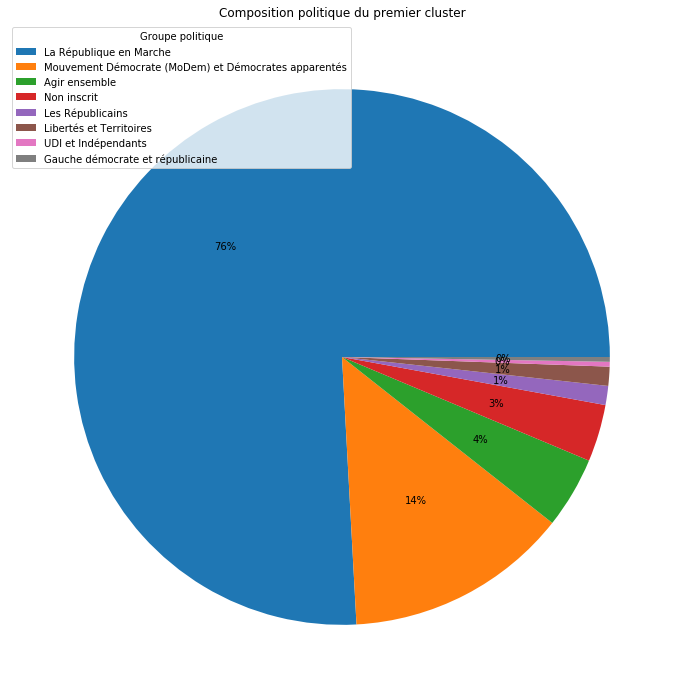

In [367]:
plt.figure(1, figsize=(12, 14))

g = plt.pie(list_cluster[0]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster[0]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
plt.show()

[Text(0, 0, 'Socialistes et apparentés'),
 Text(0, 0, 'Les Républicains'),
 Text(0, 0, 'Non inscrit'),
 Text(0, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(0, 0, 'Libertés et Territoires'),
 Text(0, 0, 'La France insoumise'),
 Text(0, 0, 'La République en Marche'),
 Text(0, 0, 'UDI et Indépendants'),
 Text(0, 0, 'Gauche démocrate et républicaine'),
 Text(0, 0, 'Agir ensemble')]

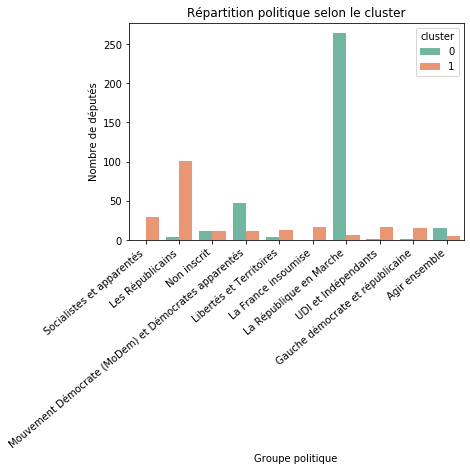

In [361]:
g = sns.countplot(data=df_final, x='Groupe politique (complet)', palette='Set2', hue='cluster')
plt.title('Répartition politique selon le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')